In [32]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from utils import calculate_eer,draw_err_gender,draw_err,utils_graph,utils_scatter,plot_confusion_matrix,play_music,draw_err_age

In [33]:
data=pd.read_csv('C:/Users/M1/Desktop/VGG/src/result_english.csv',encoding='latin1', error_bad_lines=False, warn_bad_lines=False)
lan='en'

In [34]:
data.sample(10)

,audio_1,audio_2,age_1,age_2,gender_1,gender_2,label,simlarity,distance
1061,id01399/audio00005.wav,id01399/audio00006.wav,old,NaN,male,NaN,1,0.98,0.05
124,id02321/audio00001.wav,id02373/audio00015.wav,old,old,female,female,0,0.58,0.84
1498,id03135/audio00004.wav,id02458/audio00001.wav,old,young,male,female,0,0.49,1.03
1421,id03473/audio00005.wav,id02258/audio00023.wav,old,old,male,male,0,0.52,0.97
1320,id00649/audio00000.wav,id01434/audio00021.wav,old,old,male,female,0,0.56,0.87
2588,id01794/audio00007.wav,id01794/audio00020.wav,young,NaN,male,NaN,1,0.93,0.13
1523,id00957/audio00000.wav,id00957/audio00047.wav,old,NaN,male,NaN,1,0.86,0.27
1158,id03106/audio00009.wav,id03106/audio00002.wav,old,NaN,male,NaN,1,0.95,0.10
1644,id02371/audio00001.wav,id01499/audio00022.wav,young,young,female,female,0,0.60,0.80
306,id00038/audio00006.wav,id02263/audio00001.wav,old,young,female,female,0,0.71,0.58


## Calcolo ERR FAR AND FRR



In [35]:
#All
label=data.loc[:,'label'];
similarity=data.loc[:,'simlarity'];
m,far_t,frr_t,far,frr,eer,thr,thresholds=calculate_eer(label,similarity);

#Old
data_o=data[data.age_1=='old'];
similarity_o=data_o.loc[:,'simlarity'];
label_o=data_o.loc[:,'label'];
m_o,far_ot,frr_ot,far_o,frr_o,eer_o,thr_o,t_o=calculate_eer(label_o,similarity_o);

#Young
data_y=data[data.age_1=='young'];
similarity_y=data_y.loc[:,'simlarity'];
label_y=data_y.loc[:,'label'];
m_y,far_yt,frr_yt,far_y,frr_y,eer_y,thr_y,t_y=calculate_eer(label_y,similarity_y);

#Female
data_fm=data[data.gender_1=='female'];
similarity_fm=data_fm.loc[:,'simlarity'];
label_fm=data_fm.loc[:,'label'];
m_fm,far_fmt,frr_fmt,far_fm,frr_fm,eer_fm,thr_fm,t_fm=calculate_eer(label_fm,similarity_fm);


#Male
data_ml=data[data.gender_1=='male'];
similarity_ml=data_ml.loc[:,'simlarity'];
label_ml=data_ml.loc[:,'label'];
m_ml,far_mlt,frr_mlt,far_ml,frr_ml,eer_ml,thr_ml,t_ml=calculate_eer(label_ml,similarity_ml);


err=round(eer*100,2);
err_o=round(eer_o*100,2);
err_y=round(eer_y*100,2);
err_fm=round(eer_fm*100,2);
err_ml=round(eer_ml*100,2);


far_o=round(far_o*100,2);
far_y=round(far_y*100,2);
far_fm=round(far_fm*100,2);
far_ml=round(far_ml*100,2);
far=round(far*100,2);

frr_o=round(frr_o*100,2);
frr_y=round(frr_y*100,2);
frr_fm=round(frr_fm*100,2);
frr_ml=round(frr_ml*100,2);
frr=round(frr*100,2);


In [36]:
from IPython.display import HTML, display
import tabulate
table = [['','<b>ERR</b>','<b>FAR</b>','<b>FRR</b>'],
         ["<b>Young</b>",err_o,far_y,frr_y],
         ["<b>Old</b>",err_y,far_o,frr_o],
         ["<b>Total</b>",err,far,frr]]
display(HTML('<font face="Arial" size="4" color="#000000"> <b>Comparation Between old and young </b>'))
temp=tabulate.tabulate(table, tablefmt='html')
table=temp.replace("<table>", "<table border=1 width=600>")
display(HTML(table))

from IPython.display import HTML, display
import tabulate
table = [['','<b>ERR</b>','<b>FAR</b>','<b>FRR</b>'],
         ["<b>Male</b>",err_ml,far_ml,frr_ml],
         ["<b>Female</b>",err_fm,far_fm,frr_fm],
         ["<b>Total</b>",err,far,frr]]
display(HTML('<font face="Arial" size="4" color="#000000"> <b>Comparation Between Male and Female</b>'))
temp=tabulate.tabulate(table, tablefmt='html')
table=temp.replace("<table>", "<table border=1 width=600>")
display(HTML(table))

,ERR,FAR,FRR
Young,2.38,4.25,3.75
Old,4.0,2.12,2.62
Total,2.84,2.56,3.12


,ERR,FAR,FRR
Male,4.31,4.5,4.13
Female,1.87,2.0,1.75
Total,2.84,2.56,3.12


## Grafici ERR FAR FRR

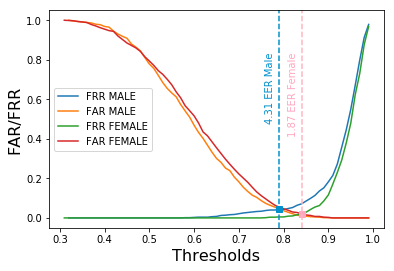

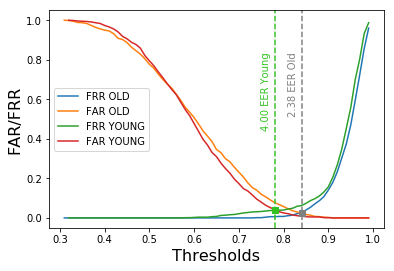

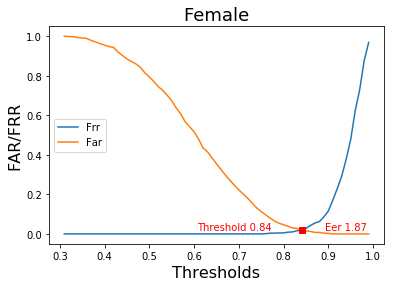

<Figure size 432x288 with 0 Axes>

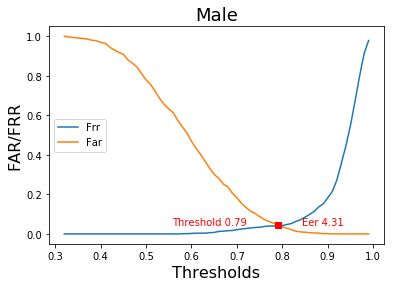

<Figure size 432x288 with 0 Axes>

In [37]:


draw_err_gender(t_ml,t_fm,frr_mlt,far_mlt,frr_fmt,far_fmt,thr_ml,eer_ml,thr_fm,eer_fm,'ERR male and female')
draw_err_age(t_o,t_y,frr_ot,far_ot,frr_yt,far_yt,thr_o,eer_o,thr_y,eer_y,'ERR old and young')
draw_err(t_fm,frr_fmt,far_fmt,thr_fm,eer_fm,'Female')
draw_err(t_ml,frr_mlt,far_mlt,thr_ml,eer_ml,'Male')



## Accuratezza

In [38]:
count=0;
for ind in data.index:
    if data.loc[ind,'simlarity'] >  thr:
        data.loc[ind,'classe_s']=1;
    else:
        data.loc[ind,'classe_s']=0;

    

In [39]:
predict=data['label']==data['classe_s']
acc=sum(predict)/data.label.count()
d=data[predict==True]
Num_rec_fm=data[data.gender_1=='female'].audio_1.count();
Num_rec_ml=data[data.gender_1=='male'].audio_1.count();
totale=Num_rec_fm+Num_rec_ml;
acc_fm=(d[d.gender_1=='female'].audio_1.count())/Num_rec_fm;
acc_ml=(d[d.gender_1=='male'].audio_1.count())/Num_rec_fm;

table = [['','<b>Numero record</b>','<b>Accuracy</b>'],
         ["<b>Female</b>",Num_rec_fm,acc_fm],
         ["<b>Male</b>",Num_rec_ml,acc_ml],
         ["<b>Totale</b>",totale,acc]]
display(HTML('<font face="Times New Roman" size="4" color="#000000"> <b>Accuracy</b>'))
temp=tabulate.tabulate(table, tablefmt='html')
table=temp.replace("<table>", "<table border=1 width=600>")
display(HTML(table))

,Numero record,Accuracy
Female,1600,0.978125
Male,1600,0.96125
Totale,3200,0.9696875


## Score Leggittimi per Sesso

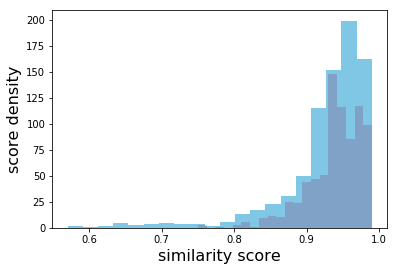

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pos_lab=data[data.label==1]
df_pos_lab_fm=df_pos_lab[df_pos_lab.gender_1=='female']

num_bins = 20

# the histogram of the data
n, bins, patches = plt.hist(df_pos_lab_fm.simlarity, num_bins,color='#ffb6c1' );
df_pos_lab_ml=df_pos_lab[df_pos_lab.gender_1=='male'];
n, bins, patches = plt.hist(df_pos_lab_ml.simlarity, num_bins,color='#0090cc',alpha=0.5);
plt.xlabel('similarity score', fontsize=16);
plt.ylabel('score density', fontsize=16);

#print(d.simlarity)

## Score Leggittimi per Età

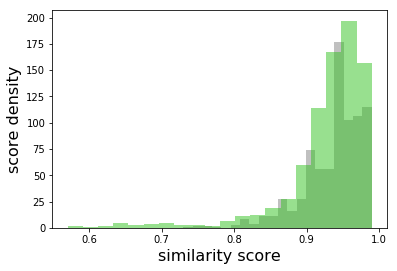

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pos_lab=data[data.label==1]
df_pos_lab_fm=df_pos_lab[df_pos_lab.age_1=='old']

num_bins = 20

# the histogram of the data
n, bins, patches = plt.hist(df_pos_lab_fm.simlarity, num_bins,color='#C0C0C0' )
df_pos_lab_ml=df_pos_lab[df_pos_lab.age_1=='young'];
n, bins, patches = plt.hist(df_pos_lab_ml.simlarity, num_bins,color='#33c221',alpha=0.5);
plt.xlabel('similarity score', fontsize=16);
plt.ylabel('score density', fontsize=16);


## Score Impostori per Sesso

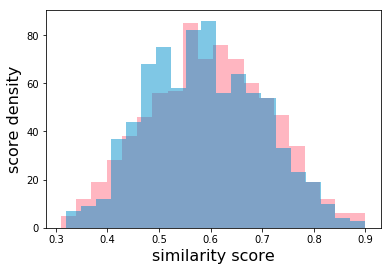

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

df_neg_lab=data[data.label==0]

df_neg_lab_fm=df_neg_lab[df_neg_lab.gender_1=='female']
fig, ax = plt.subplots()
num_bins = 20
n, bins, patches = ax.hist(df_neg_lab_fm.simlarity, num_bins,color='#ffb6c1');
df_neg_lab_ml=df_neg_lab[df_neg_lab.gender_1=='male']
n, bins, patches = ax.hist(df_neg_lab_ml.simlarity, num_bins,color='#0090cc',alpha=0.5);
#plt.title('Score negative tuple', fontsize=18);
plt.xlabel('similarity score', fontsize=16);
plt.ylabel('score density', fontsize=16);
#print(d.simlarity)

## Score Impostori per Età

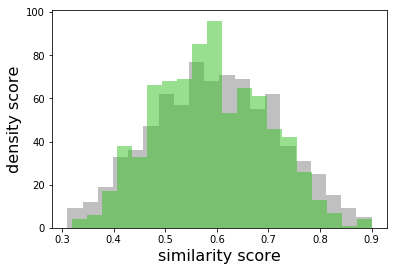

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pos_lab=data[data.label==0]
df_pos_lab_fm=df_pos_lab[df_pos_lab.age_1=='old']

num_bins = 20

# the histogram of the data
n, bins, patches = plt.hist(df_pos_lab_fm.simlarity, num_bins,color='#C0C0C0' );
df_pos_lab_ml=df_pos_lab[df_pos_lab.age_1=='young'];
n, bins, patches = plt.hist(df_pos_lab_ml.simlarity, num_bins,color='#33c221',alpha=0.5);
#plt.title('Score positive tuple', fontsize=18)
plt.xlabel('similarity score', fontsize=16);
plt.ylabel('density score', fontsize=16);


## BarPlot leggittimi

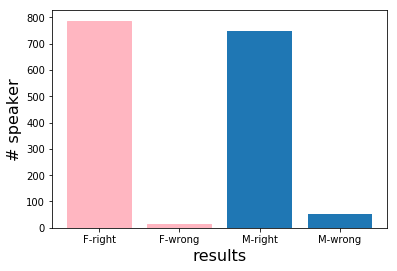

In [44]:

labs_ml,values_ml=utils_graph(data,'male','M',1);
labs_fm,values_fm=utils_graph(data,'female','F',1);

values=values_fm+values_ml;
labs=labs_fm+labs_ml;
bar=plt.bar(labs, values);
bar[0].set_color('#ffb6c1');
bar[1].set_color('#ffb6c1');
plt.xlabel('results', fontsize=16);
plt.ylabel('# speaker', fontsize=16);
plt.show();

## BarPlot impostori

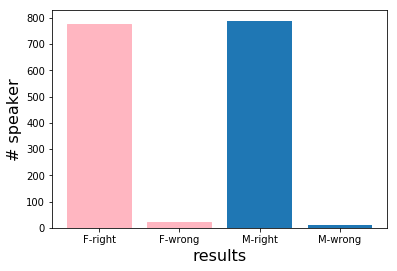

In [45]:
labs_ml,values_ml=utils_graph(data,'male','M',0);
labs_fm,values_fm=utils_graph(data,'female','F',0);

values=values_fm+values_ml
labs=labs_fm+labs_ml
bar=plt.bar(labs, values)
bar[0].set_color('#ffb6c1')
bar[1].set_color('#ffb6c1')
plt.xlabel('results', fontsize=16)
plt.ylabel('# speaker', fontsize=16)
plt.show()

## Distribuzione errori per maschi

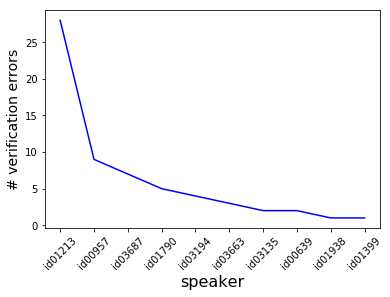

In [47]:
from matplotlib.pyplot import figure
from collections import Counter

d=data;
predict=d['label']==d['classe_s']
d=d[predict==False]
d_m=d[d.gender_1=='male']
d_f=d[d.gender_1=='female']

lista_m=[]
lista_f=[]

for aud in d_m.audio_1:
    lista_m.append(aud[0:7])
labels_m, values_m = zip(*Counter(lista_m).items()) 
values_m, labels_m = zip(*sorted(zip(values_m, labels_m),reverse=True))

for aud in d_f.audio_1:
    lista_f.append(aud[0:7])
labels_f, values_f = zip(*Counter(lista_f).items()) 
values_f, labels_f = zip(*sorted(zip(values_f, labels_f),reverse=True))

plt.plot(labels_m,values_m,color='#0000ff');
plt.xticks(rotation=45);
plt.xlabel('speaker', fontsize=16);
plt.ylabel('# verification errors', fontsize=14);




## Distribuzione errori per femmine

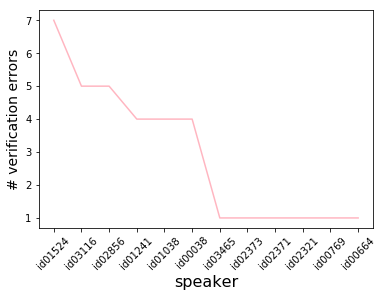

In [48]:
plt.plot(labels_f,values_f,color='#ffb6c1');
plt.xticks(rotation=45);
plt.xlabel('speaker', fontsize=16);
plt.ylabel('# verification errors', fontsize=14);

## Distribuzione errori per giovani

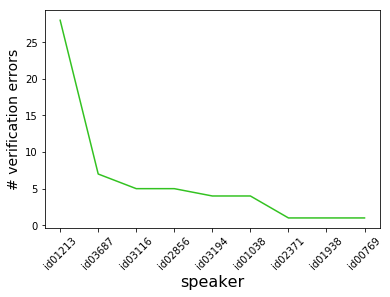

In [49]:
from matplotlib.pyplot import figure
from collections import Counter

d=data;
predict=d['label']==d['classe_s']
d=d[predict==False]
d_y=d[d.age_1=='young']
d_o=d[d.age_1=='old']

lista_o=[]
lista_y=[]

for aud in d_o.audio_1:
    lista_o.append(aud[0:7])
labels_o, values_o = zip(*Counter(lista_o).items()) 
values_o, labels_o= zip(*sorted(zip(values_o, labels_o),reverse=True))

for aud in d_y.audio_1:
    lista_y.append(aud[0:7])
labels_y, values_y = zip(*Counter(lista_y).items()) 
values_y, labels_y = zip(*sorted(zip(values_y, labels_y),reverse=True))

plt.plot(labels_y,values_y,color='#33c221');
plt.xticks(rotation=45);
plt.xlabel('speaker', fontsize=16);
plt.ylabel('# verification errors', fontsize=14);


## Distribuzione errori per anziani

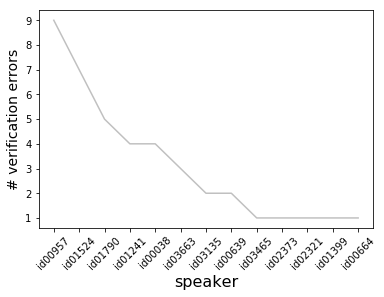

In [50]:
plt.plot(labels_o,values_o,color='#C0C0C0');
plt.xticks(rotation=45);
plt.xlabel('speaker', fontsize=16);
plt.ylabel('# verification errors', fontsize=14);

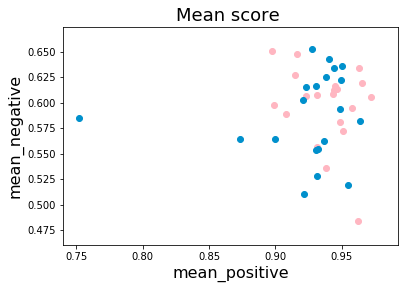

In [51]:
mean_pos_f,mean_neg_f=utils_scatter(data[data.gender_1=='female']);
mean_pos_m,mean_neg_m=utils_scatter(data[data.gender_1=='male']);
plt.scatter(mean_pos_f,mean_neg_f,color='#ffb6c1');
plt.scatter(mean_pos_m,mean_neg_m,color='#0090cc');
plt.title('Mean score ', fontsize=18);
plt.xlabel('mean_positive', fontsize=16);
plt.ylabel('mean_negative', fontsize=16);


## Other Test

In [32]:
#cambia da metrica di misura

path="C:/Users/M1/Documents/FairVoice/English/"
d=data[data.gender_1=='male']
predict=d['label']== d['classe_s']
d=d[predict==False]
#d=d[d.simlarity>=0.80]
d=d[d.gender_2 == 'female']

for idx in d.index:
    print('coppia')
    music_file=path+d.loc[idx,'audio_1']
    play_music(music_file, volume=0.8)
    music_file=path+d.loc[idx,'audio_2']
    play_music(music_file, volume=0.8)



coppia
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file C:/Users/M1/Documents/FairVoice/English/id03607/audio00009.mp3 loaded!
Music file C:/Users/M1/Documents/FairVoice/English/id03781/audio00013.mp3 loaded!


KeyboardInterrupt: 